In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18,9
rcParams['font.family'] = 'AppleGothic' #malgun Gothic

# 여기서 부터는 구글 COLAB구동시 필요
from google.colab import files     #colab 돌릴때
uploaded = files.upload()          #colab 돌릴때




Saving winequality-red.csv to winequality-red.csv
Saving winequality-white.csv to winequality-white.csv


In [2]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

  


Found GPU at: /device:GPU:0
Wed Jun  1 05:41:13 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    26W /  70W |    264MiB / 15109MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                            

In [3]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
1.5051970530000176
GPU (s):
0.04039955400003237
GPU speedup over CPU: 37x


In [4]:
red = pd.read_csv("winequality-red.csv", sep=';')             # 구분자가 콤마, 가 아닌....  세미콜론;임
print(red.shape)
red.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
import glob      # 묶어주는 라이브러리
import os        # 폴더를 컨트롤

In [6]:
all_files = glob.glob(os.path.join('wine*'))
all_files

['winequality-red.csv', 'winequality-white.csv']

In [7]:
all_data = []     # 모든 데이터를 저장하기 위해 빈리스트를 만들어둠

i=0

for file in all_files:
    data = pd.read_csv(file, sep=';')
    data['type']=i
    all_data.append(data)
    i+=1         # 타입을 확인함.   레드는 0, 화이트는 1로 정의하여 와인 구분함.
    
wine = pd.concat(all_data, ignore_index=True)      # 데이터를 합침concat, concat은 axis가 기본값이   0임,  
                                                    #기존인데스를 가지고 와서 6천여개중 4900여개로 표시됨, 그래서 기존 인데스 무시처리

In [8]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [9]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


> **우리의 목표: 와인성분데이터를 넣으면 와인의 품질을 예측하는 모형

In [10]:
sorted(wine.quality.unique())             # 목표 변수

[3, 4, 5, 6, 7, 8, 9]

In [11]:
wine.quality.value_counts()               # 값 별 카운트

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [12]:
wine[wine.quality ==9]                   # 특정 값을 지는 리스트를 보고 싶어

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2373,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,1
2419,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,1
2426,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,1
2475,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,1
3204,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,1


### 탐색적분석  ------------------------
- 레드와인인지 화이트와인인지에 따라 품질이 다를까?

In [13]:
wine.groupby('type').quality.describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
0,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
1,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [14]:
red_quality = wine.loc[wine.type == 0, 'quality']


In [15]:
white_quality = wine.loc[wine.type==1, 'quality']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


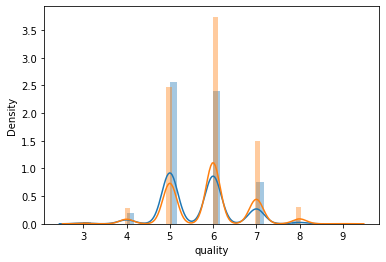

In [16]:
sns.distplot(red_quality, label='Red')
sns.distplot(white_quality, label="White")

### T검정
- 와인종류에 따른 품질의 차이가 통계적으로 유의한지 확인하기 위함
- p value < 0.05     그래야 유의미한 의미임 95%  ******

In [17]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [18]:
tstat, pvalue, df = sm.stats.ttest_ind(red_quality, white_quality)

In [19]:
print("T값은 %.5f, p-value는 %.8f"%(tstat, pvalue))

T값은 -9.68565, p-value는 0.00000000


### 상관관계분석

In [20]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218


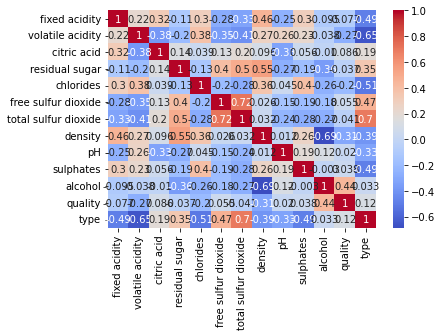

In [21]:
sns.heatmap(wine.corr(), annot=True, cmap='coolwarm')

In [22]:
#너무 상관관계가 높은 아이들끼리는 같이 쓰지말고 둘중 하나를 쓰는게 좋음 공분산도가 높아짐

In [23]:
wine.corrwith(wine.quality).sort_values()

density                -0.305858
volatile acidity       -0.265699
chlorides              -0.200666
fixed acidity          -0.076743
total sulfur dioxide   -0.041385
residual sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free sulfur dioxide     0.055463
citric acid             0.085532
type                    0.119323
alcohol                 0.444319
quality                 1.000000
dtype: float64

### 산점도 pairplot
- 모든 회귀문제는 산점도가 있어야 파악이 용이
- 하지만 모든 점을 산점도를 그리면   성능문제발생,   그래서 샘플링을 하여 산점도로 변수간 관계를 만듦

In [24]:
def sampling(data, n=300):         #와인 샘플링
    return data.loc[np.random.choice(data.index, size=n, replace=False)]        #choice  인덱스 골라냄,  replace 중복미허용F

In [25]:
red = wine[wine.type ==0]
white = wine[wine.type ==1]

In [26]:
red_sample = sampling(red)
print(red_sample.shape)
red_sample.head()

(300, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
394,12.7,0.600,0.65,2.3,0.063,6.0,25.0,0.99970,3.03,0.57,9.9,5,0
791,8.8,0.640,0.17,2.9,0.084,25.0,130.0,0.99818,3.23,0.54,9.6,5,0
112,8.4,0.600,0.10,2.2,0.085,14.0,111.0,0.99640,3.15,0.66,9.8,5,0
509,13.3,0.290,0.75,2.8,0.084,23.0,43.0,0.99860,3.04,0.68,11.4,7,0
711,8.9,0.565,0.34,3.0,0.093,16.0,112.0,0.99980,3.38,0.61,9.5,5,0


In [27]:
white_sample = sampling(white)
print(white_sample.shape)
white_sample.head()

(300, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4024,7.2,0.24,0.29,3.0,0.036,17.0,117.0,0.99411,3.36,0.68,10.1,6,1
4160,6.9,0.28,0.22,10.0,0.052,36.0,131.0,0.99696,3.08,0.46,9.6,5,1
1711,7.2,0.31,0.50,13.3,0.056,68.0,195.0,0.99820,3.01,0.47,9.2,5,1
4547,6.8,0.26,0.48,6.2,0.049,55.0,182.0,0.99582,3.21,0.45,9.4,6,1
5604,6.8,0.14,0.35,1.5,0.047,40.0,117.0,0.99111,3.07,0.72,11.1,6,1


In [28]:
wine_sample = pd.concat([red_sample, white_sample])

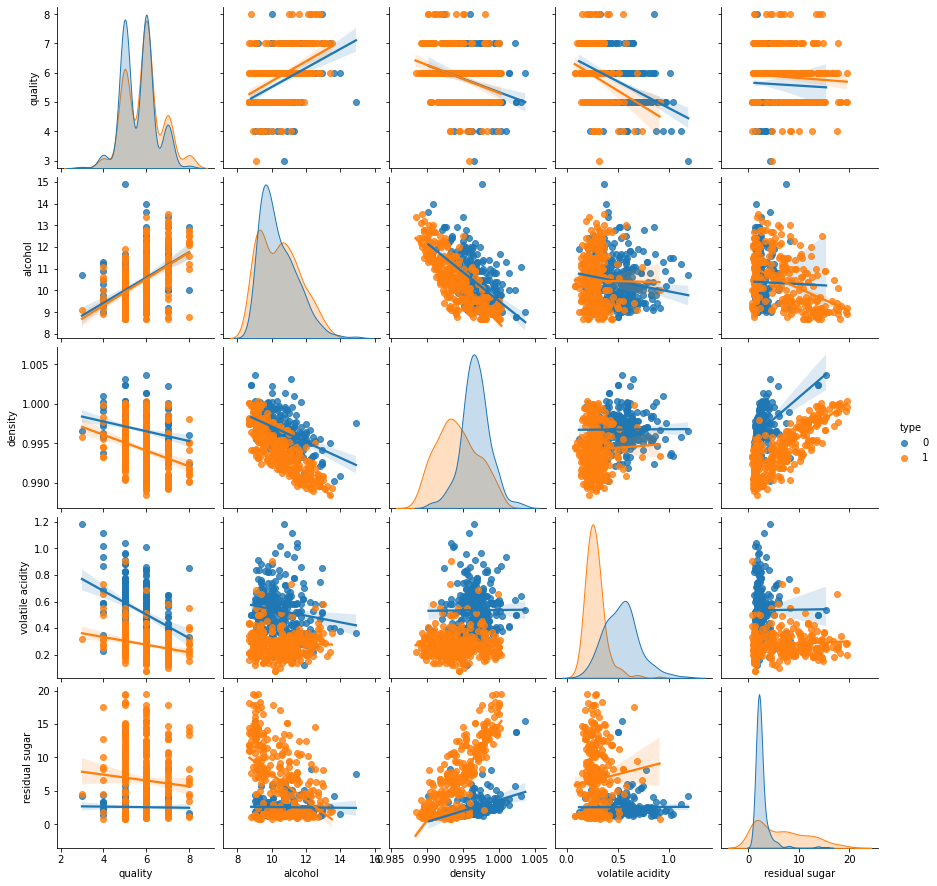

In [29]:
sns.pairplot(wine_sample, hue='type', kind='reg',
            vars=['quality', 'alcohol', 'density', 'volatile acidity', 'residual sugar'])     #pairplot 회귀문제에서 꼭 필요***

### .
- 선형회귀모형  만들기

In [30]:
wine.columns = wine.columns.str.replace(' ','_')

In [31]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [32]:
features = ['fixed_acidity', 'volatile_acidity', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type']            #예측모델을 만들기 위해 핏쳐 셀렉션을 함

In [33]:
# features_B = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type']

In [34]:
# features_D = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'fixed_acidity']

In [35]:
# features_E = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'fixed_acidity', 'chlorides']

In [36]:
# features_F = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'fixed_acidity', 'chlorides', 'free_sulfur_dioxide']

In [37]:
# features_G = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'fixed_acidity', 'chlorides', 'free_sulfur_dioxide', 'pH']

In [38]:
y = wine.quality
X = wine[wine.columns.difference(['quality', 'type'])]
X_standard = (X - X.mean())/ X.std()    #표준화 : 단위기준을 맞춤
wine_standard = pd.concat([X_standard, wine.quality, wine.type], axis=1)

In [39]:
X = wine_standard[features]

# 훈련데이터셋과 테스트데이터셋으로 나누자
### 회귀분석의 경우는.... 훈련데이터셋과 테스트 데이터 셋을 나누어야 함

In [40]:
from sklearn.model_selection import train_test_split                   #머신러닝 라이브러리는 사이킷런에 있음

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, wine.quality, train_size=0.8, random_state=31)


In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 10)
(1300, 10)
(5197,)
(1300,)


In [43]:
# 모델정의


In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
model = LinearRegression()

In [46]:
model.fit(X_train, y_train)

LinearRegression()

In [47]:
# prediction = model.predict(X_test)

In [48]:
# prediction

### 모델평가

In [49]:
from sklearn import metrics

In [50]:
# metrics.mean_absolute_error(y_test, prediction)

In [51]:
# metrics.mean_squared_error(y_test, prediction)                 #  오류율이 낮아야 좋은 모델    

### 하단 개인작업구간

### 숫자를 떨어뜨려라  (과제)
- 1. 그전에 핏쳐의 셀렉션과 조합, 핏처 엔지니어링... 등
- 2. 하이퍼 파라메터 수정해가며 수정
- 3. 랜덤포레스트 이용.

> **metrics.mean_squared_error(y_test, prediction)   오류율 낮추기 

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [53]:
# test_model = RandomForestRegressor(n_estimators = 300, 
#                                   max_depth = 20, 
#                                   max_features =0.7,
#                                   random_state=31)

In [54]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=5)                 #'neg_mean_squared_error'

In [55]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=10)                 #'neg_mean_squared_error'

In [56]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=5).mean()

In [57]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=10).mean()

# 하이퍼 파라메터 시작...


In [59]:
from tqdm import tqdm

hyper_result =[]

n_estimators = [300]    # 100~1000 해봄 , 클스룩 neg err은 미세하지만 낮아짐, 그렇다고 squ err이 낮아지는 것을 보장하지 않음

for c in tqdm(n_estimators):
    for i in tqdm(range(200)):
        a = np.random.randint(5,80)
        b = np.random.uniform(0.2,0.9)
        
        model = RandomForestRegressor(n_estimators = c, 
                                    max_depth = a, 
                                    max_features =b,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    random_state=31,
                                    n_jobs=-1)

        score = cross_val_score(model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=15).mean()

        hyper_result.append({'점수' : score,
                            'n_estimators' : c,
                            'MAX_depth': a,
                            'MAX_features': b,
                            'cv' : 15}
                            )
                

        print("현재 스코어는 {0:.5f}".format(score))


  0%|          | 1/200 [00:26<1:27:01, 26.24s/it]

현재 스코어는 -0.37954



  1%|          | 2/200 [00:47<1:16:26, 23.17s/it]

현재 스코어는 -0.37500



  2%|▏         | 3/200 [01:06<1:09:42, 21.23s/it]

현재 스코어는 -0.37489



  2%|▏         | 4/200 [01:17<56:57, 17.44s/it]  

현재 스코어는 -0.50308



  2%|▎         | 5/200 [01:41<1:03:37, 19.58s/it]

현재 스코어는 -0.37831



  3%|▎         | 6/200 [01:59<1:01:53, 19.14s/it]

현재 스코어는 -0.37459



  4%|▎         | 7/200 [02:22<1:05:54, 20.49s/it]

현재 스코어는 -0.37831



  4%|▍         | 8/200 [02:51<1:13:52, 23.09s/it]

현재 스코어는 -0.38091



  4%|▍         | 9/200 [03:06<1:05:19, 20.52s/it]

현재 스코어는 -0.49350



  5%|▌         | 10/200 [03:29<1:07:36, 21.35s/it]

현재 스코어는 -0.37831



  6%|▌         | 11/200 [03:50<1:06:57, 21.26s/it]

현재 스코어는 -0.37500



  6%|▌         | 12/200 [04:13<1:08:37, 21.90s/it]

현재 스코어는 -0.37831



  6%|▋         | 13/200 [04:33<1:06:32, 21.35s/it]

현재 스코어는 -0.37992



  7%|▋         | 14/200 [04:47<59:00, 19.04s/it]  

현재 스코어는 -0.49482



  8%|▊         | 15/200 [05:16<1:07:26, 21.88s/it]

현재 스코어는 -0.38217



  8%|▊         | 16/200 [05:44<1:12:59, 23.80s/it]

현재 스코어는 -0.38104



  8%|▊         | 17/200 [06:09<1:14:15, 24.34s/it]

현재 스코어는 -0.37954



  9%|▉         | 18/200 [06:28<1:08:20, 22.53s/it]

현재 스코어는 -0.37486



 10%|▉         | 19/200 [06:43<1:01:42, 20.46s/it]

현재 스코어는 -0.37516



 10%|█         | 20/200 [06:59<57:06, 19.04s/it]  

현재 스코어는 -0.37544



 10%|█         | 21/200 [07:27<1:04:55, 21.76s/it]

현재 스코어는 -0.38104



 11%|█         | 22/200 [07:42<58:19, 19.66s/it]  

현재 스코어는 -0.38708



 12%|█▏        | 23/200 [08:05<1:00:51, 20.63s/it]

현재 스코어는 -0.37831



 12%|█▏        | 24/200 [08:21<56:09, 19.15s/it]  

현재 스코어는 -0.37516



 12%|█▎        | 25/200 [08:43<58:34, 20.08s/it]

현재 스코어는 -0.38460



 13%|█▎        | 26/200 [09:11<1:05:14, 22.50s/it]

현재 스코어는 -0.38105



 14%|█▎        | 27/200 [09:34<1:05:17, 22.65s/it]

현재 스코어는 -0.37831



 14%|█▍        | 28/200 [09:50<58:51, 20.53s/it]  

현재 스코어는 -0.37505



 14%|█▍        | 29/200 [10:16<1:03:16, 22.20s/it]

현재 스코어는 -0.39393



 15%|█▌        | 30/200 [10:34<59:30, 21.00s/it]  

현재 스코어는 -0.37489



 16%|█▌        | 31/200 [10:52<56:48, 20.17s/it]

현재 스코어는 -0.37489



 16%|█▌        | 32/200 [11:07<51:53, 18.53s/it]

현재 스코어는 -0.47735



 16%|█▋        | 33/200 [11:35<59:31, 21.39s/it]

현재 스코어는 -0.38144



 17%|█▋        | 34/200 [12:03<1:04:44, 23.40s/it]

현재 스코어는 -0.38104



 18%|█▊        | 35/200 [12:21<59:56, 21.80s/it]  

현재 스코어는 -0.37503



 18%|█▊        | 36/200 [12:37<54:33, 19.96s/it]

현재 스코어는 -0.37516



 18%|█▊        | 37/200 [13:02<58:47, 21.64s/it]

현재 스코어는 -0.37954



 19%|█▉        | 38/200 [13:28<1:01:32, 22.79s/it]

현재 스코어는 -0.37977



 20%|█▉        | 39/200 [13:44<55:31, 20.69s/it]  

현재 스코어는 -0.49428



 20%|██        | 40/200 [14:02<53:12, 19.95s/it]

현재 스코어는 -0.37489



 20%|██        | 41/200 [14:15<47:10, 17.80s/it]

현재 스코어는 -0.43099



 21%|██        | 42/200 [14:30<45:14, 17.18s/it]

현재 스코어는 -0.37516



 22%|██▏       | 43/200 [14:56<51:27, 19.66s/it]

현재 스코어는 -0.37954



 22%|██▏       | 44/200 [15:19<53:57, 20.75s/it]

현재 스코어는 -0.37831



 22%|██▎       | 45/200 [15:42<55:11, 21.36s/it]

현재 스코어는 -0.37831



 23%|██▎       | 46/200 [16:07<58:03, 22.62s/it]

현재 스코어는 -0.37954



 24%|██▎       | 47/200 [16:23<52:27, 20.57s/it]

현재 스코어는 -0.37516



 24%|██▍       | 48/200 [16:54<59:51, 23.63s/it]

현재 스코어는 -0.38278



 24%|██▍       | 49/200 [17:25<1:04:50, 25.76s/it]

현재 스코어는 -0.38278



 25%|██▌       | 50/200 [17:52<1:05:15, 26.10s/it]

현재 스코어는 -0.38803



 26%|██▌       | 51/200 [18:12<1:00:51, 24.51s/it]

현재 스코어는 -0.37500



 26%|██▌       | 52/200 [18:28<53:47, 21.81s/it]  

현재 스코어는 -0.37527



 26%|██▋       | 53/200 [18:59<1:00:10, 24.56s/it]

현재 스코어는 -0.38278



 27%|██▋       | 54/200 [19:22<58:32, 24.06s/it]  

현재 스코어는 -0.37831



 28%|██▊       | 55/200 [19:45<57:15, 23.69s/it]

현재 스코어는 -0.37831



 28%|██▊       | 56/200 [20:03<52:44, 21.98s/it]

현재 스코어는 -0.37580



 28%|██▊       | 57/200 [20:26<53:23, 22.41s/it]

현재 스코어는 -0.38090



 29%|██▉       | 58/200 [20:42<48:24, 20.45s/it]

현재 스코어는 -0.37516



 30%|██▉       | 59/200 [21:00<46:44, 19.89s/it]

현재 스코어는 -0.37489



 30%|███       | 60/200 [21:19<45:24, 19.46s/it]

현재 스코어는 -0.37543



 30%|███       | 61/200 [21:48<51:31, 22.24s/it]

현재 스코어는 -0.38108



 31%|███       | 62/200 [22:13<53:33, 23.28s/it]

현재 스코어는 -0.37954



 32%|███▏      | 63/200 [22:45<58:40, 25.70s/it]

현재 스코어는 -0.38278



 32%|███▏      | 64/200 [23:08<56:34, 24.96s/it]

현재 스코어는 -0.37831



 32%|███▎      | 65/200 [23:26<51:47, 23.02s/it]

현재 스코어는 -0.37489



 33%|███▎      | 66/200 [23:50<51:34, 23.09s/it]

현재 스코어는 -0.37831



 34%|███▎      | 67/200 [24:08<47:55, 21.62s/it]

현재 스코어는 -0.37489



 34%|███▍      | 68/200 [24:29<46:59, 21.36s/it]

현재 스코어는 -0.37500



 34%|███▍      | 69/200 [24:49<46:11, 21.16s/it]

현재 스코어는 -0.37500



 35%|███▌      | 70/200 [25:07<43:50, 20.23s/it]

현재 스코어는 -0.37489



 36%|███▌      | 71/200 [25:36<48:48, 22.70s/it]

현재 스코어는 -0.38104



 36%|███▌      | 72/200 [25:48<41:34, 19.49s/it]

현재 스코어는 -0.48397



 36%|███▋      | 73/200 [26:04<38:50, 18.35s/it]

현재 스코어는 -0.46180



 37%|███▋      | 74/200 [26:17<35:28, 16.89s/it]

현재 스코어는 -0.45128



 38%|███▊      | 75/200 [26:48<44:10, 21.21s/it]

현재 스코어는 -0.38278



 38%|███▊      | 76/200 [27:14<46:42, 22.60s/it]

현재 스코어는 -0.37954



 38%|███▊      | 77/200 [27:40<48:14, 23.53s/it]

현재 스코어는 -0.37954



 39%|███▉      | 78/200 [28:01<46:18, 22.77s/it]

현재 스코어는 -0.37500



 40%|███▉      | 79/200 [28:21<44:31, 22.08s/it]

현재 스코어는 -0.38161



 40%|████      | 80/200 [28:51<48:57, 24.48s/it]

현재 스코어는 -0.38753



 40%|████      | 81/200 [29:14<47:43, 24.07s/it]

현재 스코어는 -0.37831



 41%|████      | 82/200 [29:30<42:34, 21.65s/it]

현재 스코어는 -0.37516



 42%|████▏     | 83/200 [29:46<38:51, 19.93s/it]

현재 스코어는 -0.37516



 42%|████▏     | 84/200 [30:10<40:27, 20.93s/it]

현재 스코어는 -0.37831



 42%|████▎     | 85/200 [30:30<39:58, 20.86s/it]

현재 스코어는 -0.37500



 43%|████▎     | 86/200 [30:51<39:40, 20.88s/it]

현재 스코어는 -0.37500



 44%|████▎     | 87/200 [31:19<43:26, 23.07s/it]

현재 스코어는 -0.38104



 44%|████▍     | 88/200 [31:42<42:46, 22.91s/it]

현재 스코어는 -0.42063



 44%|████▍     | 89/200 [31:58<38:17, 20.70s/it]

현재 스코어는 -0.37615



 45%|████▌     | 90/200 [32:16<36:32, 19.94s/it]

현재 스코어는 -0.37489



 46%|████▌     | 91/200 [32:34<35:13, 19.39s/it]

현재 스코어는 -0.37517



 46%|████▌     | 92/200 [33:04<40:57, 22.75s/it]

현재 스코어는 -0.38278



 46%|████▋     | 93/200 [33:25<39:23, 22.08s/it]

현재 스코어는 -0.37500



 47%|████▋     | 94/200 [33:48<39:27, 22.34s/it]

현재 스코어는 -0.37834



 48%|████▊     | 95/200 [34:06<36:56, 21.11s/it]

현재 스코어는 -0.37489



 48%|████▊     | 96/200 [34:35<40:28, 23.35s/it]

현재 스코어는 -0.39172



 48%|████▊     | 97/200 [35:00<41:09, 23.98s/it]

현재 스코어는 -0.37954



 49%|████▉     | 98/200 [35:15<35:59, 21.17s/it]

현재 스코어는 -0.39118



 50%|████▉     | 99/200 [35:40<37:43, 22.41s/it]

현재 스코어는 -0.37954



 50%|█████     | 100/200 [35:56<33:54, 20.35s/it]

현재 스코어는 -0.37498



 50%|█████     | 101/200 [36:17<33:53, 20.54s/it]

현재 스코어는 -0.37826



 51%|█████     | 102/200 [36:28<29:05, 17.81s/it]

현재 스코어는 -0.50308



 52%|█████▏    | 103/200 [36:49<30:17, 18.73s/it]

현재 스코어는 -0.37500



 52%|█████▏    | 104/200 [37:07<29:47, 18.62s/it]

현재 스코어는 -0.47831



 52%|█████▎    | 105/200 [37:38<35:14, 22.26s/it]

현재 스코어는 -0.38278



 53%|█████▎    | 106/200 [37:54<31:46, 20.28s/it]

현재 스코어는 -0.37516



 54%|█████▎    | 107/200 [38:09<29:16, 18.89s/it]

현재 스코어는 -0.37516



 54%|█████▍    | 108/200 [38:25<27:28, 17.92s/it]

현재 스코어는 -0.37516



 55%|█████▍    | 109/200 [38:39<25:37, 16.90s/it]

현재 스코어는 -0.47735



 55%|█████▌    | 110/200 [39:00<27:08, 18.10s/it]

현재 스코어는 -0.37499



 56%|█████▌    | 111/200 [39:26<30:14, 20.38s/it]

현재 스코어는 -0.37954



 56%|█████▌    | 112/200 [39:55<33:32, 22.87s/it]

현재 스코어는 -0.38114



 56%|█████▋    | 113/200 [40:11<30:14, 20.85s/it]

현재 스코어는 -0.37516



 57%|█████▋    | 114/200 [40:40<33:16, 23.21s/it]

현재 스코어는 -0.38104



 57%|█████▊    | 115/200 [41:03<33:00, 23.30s/it]

현재 스코어는 -0.37818



 58%|█████▊    | 116/200 [41:33<35:34, 25.41s/it]

현재 스코어는 -0.39172



 58%|█████▊    | 117/200 [41:50<31:17, 22.62s/it]

현재 스코어는 -0.37519



 59%|█████▉    | 118/200 [42:16<32:24, 23.71s/it]

현재 스코어는 -0.37955



 60%|█████▉    | 119/200 [42:42<32:58, 24.42s/it]

현재 스코어는 -0.37928



 60%|██████    | 120/200 [43:08<33:11, 24.89s/it]

현재 스코어는 -0.37954



 60%|██████    | 121/200 [43:26<30:14, 22.97s/it]

현재 스코어는 -0.37488



 61%|██████    | 122/200 [43:55<31:53, 24.53s/it]

현재 스코어는 -0.38104



 62%|██████▏   | 123/200 [44:15<29:59, 23.37s/it]

현재 스코어는 -0.37500



 62%|██████▏   | 124/200 [44:46<32:26, 25.62s/it]

현재 스코어는 -0.38278



 62%|██████▎   | 125/200 [45:04<29:16, 23.42s/it]

현재 스코어는 -0.37490



 63%|██████▎   | 126/200 [45:27<28:45, 23.31s/it]

현재 스코어는 -0.37823



 64%|██████▎   | 127/200 [45:58<31:07, 25.58s/it]

현재 스코어는 -0.38283



 64%|██████▍   | 128/200 [46:24<30:40, 25.56s/it]

현재 스코어는 -0.37954



 64%|██████▍   | 129/200 [46:40<26:56, 22.76s/it]

현재 스코어는 -0.49428



 65%|██████▌   | 130/200 [47:03<26:37, 22.83s/it]

현재 스코어는 -0.37831



 66%|██████▌   | 131/200 [47:28<27:08, 23.60s/it]

현재 스코어는 -0.38027



 66%|██████▌   | 132/200 [47:59<29:13, 25.79s/it]

현재 스코어는 -0.38278



 66%|██████▋   | 133/200 [48:30<30:29, 27.30s/it]

현재 스코어는 -0.38278



 67%|██████▋   | 134/200 [49:01<31:16, 28.43s/it]

현재 스코어는 -0.38278



 68%|██████▊   | 135/200 [49:24<29:00, 26.78s/it]

현재 스코어는 -0.37831



 68%|██████▊   | 136/200 [49:53<29:04, 27.26s/it]

현재 스코어는 -0.39592



 68%|██████▊   | 137/200 [50:13<26:33, 25.30s/it]

현재 스코어는 -0.37602



 69%|██████▉   | 138/200 [50:26<22:14, 21.53s/it]

현재 스코어는 -0.46642



 70%|██████▉   | 139/200 [50:52<23:08, 22.76s/it]

현재 스코어는 -0.37954



 70%|███████   | 140/200 [51:10<21:25, 21.43s/it]

현재 스코어는 -0.37603



 70%|███████   | 141/200 [51:41<23:53, 24.30s/it]

현재 스코어는 -0.38278



 71%|███████   | 142/200 [52:11<25:05, 25.96s/it]

현재 스코어는 -0.38908



 72%|███████▏  | 143/200 [52:26<21:43, 22.86s/it]

현재 스코어는 -0.37683



 72%|███████▏  | 144/200 [52:42<19:16, 20.66s/it]

현재 스코어는 -0.41162



 72%|███████▎  | 145/200 [53:00<18:15, 19.91s/it]

현재 스코어는 -0.37503



 73%|███████▎  | 146/200 [53:21<18:09, 20.18s/it]

현재 스코어는 -0.37500



 74%|███████▎  | 147/200 [53:44<18:31, 20.97s/it]

현재 스코어는 -0.38090



 74%|███████▍  | 148/200 [54:12<20:04, 23.16s/it]

현재 스코어는 -0.38104



 74%|███████▍  | 149/200 [54:35<19:36, 23.07s/it]

현재 스코어는 -0.37839



 75%|███████▌  | 150/200 [54:47<16:35, 19.91s/it]

현재 스코어는 -0.49668



 76%|███████▌  | 151/200 [55:18<18:57, 23.21s/it]

현재 스코어는 -0.38278



 76%|███████▌  | 152/200 [55:36<17:18, 21.63s/it]

현재 스코어는 -0.37489



 76%|███████▋  | 153/200 [55:54<16:00, 20.43s/it]

현재 스코어는 -0.40863



 77%|███████▋  | 154/200 [56:17<16:15, 21.21s/it]

현재 스코어는 -0.37831



 78%|███████▊  | 155/200 [56:48<18:04, 24.10s/it]

현재 스코어는 -0.38278



 78%|███████▊  | 156/200 [57:19<19:07, 26.09s/it]

현재 스코어는 -0.38295



 78%|███████▊  | 157/200 [57:40<17:37, 24.59s/it]

현재 스코어는 -0.37500



 79%|███████▉  | 158/200 [58:02<16:50, 24.07s/it]

현재 스코어는 -0.37818



 80%|███████▉  | 159/200 [58:21<15:13, 22.27s/it]

현재 스코어는 -0.37489



 80%|████████  | 160/200 [58:41<14:31, 21.79s/it]

현재 스코어는 -0.37500



 80%|████████  | 161/200 [58:56<12:43, 19.57s/it]

현재 스코어는 -0.51080



 81%|████████  | 162/200 [59:26<14:31, 22.94s/it]

현재 스코어는 -0.38282



 82%|████████▏ | 163/200 [59:57<15:36, 25.32s/it]

현재 스코어는 -0.38278



 82%|████████▏ | 164/200 [1:00:12<13:16, 22.12s/it]

현재 스코어는 -0.49350



 82%|████████▎ | 165/200 [1:00:35<13:03, 22.37s/it]

현재 스코어는 -0.37840



 83%|████████▎ | 166/200 [1:00:56<12:23, 21.87s/it]

현재 스코어는 -0.37500



 84%|████████▎ | 167/200 [1:01:14<11:24, 20.75s/it]

현재 스코어는 -0.37489



 84%|████████▍ | 168/200 [1:01:33<10:51, 20.35s/it]

현재 스코어는 -0.38879



 84%|████████▍ | 169/200 [1:01:59<11:19, 21.91s/it]

현재 스코어는 -0.37954



 85%|████████▌ | 170/200 [1:02:24<11:28, 22.94s/it]

현재 스코어는 -0.37957



 86%|████████▌ | 171/200 [1:02:42<10:23, 21.51s/it]

현재 스코어는 -0.37486



 86%|████████▌ | 172/200 [1:03:08<10:39, 22.84s/it]

현재 스코어는 -0.37954



 86%|████████▋ | 173/200 [1:03:39<11:19, 25.17s/it]

현재 스코어는 -0.38278



 87%|████████▋ | 174/200 [1:04:07<11:17, 26.04s/it]

현재 스코어는 -0.38104



 88%|████████▊ | 175/200 [1:04:25<09:50, 23.64s/it]

현재 스코어는 -0.37489



 88%|████████▊ | 176/200 [1:04:46<09:06, 22.79s/it]

현재 스코어는 -0.37500



 88%|████████▊ | 177/200 [1:05:14<09:20, 24.39s/it]

현재 스코어는 -0.38104



 89%|████████▉ | 178/200 [1:05:39<09:03, 24.68s/it]

현재 스코어는 -0.37973



 90%|████████▉ | 179/200 [1:06:05<08:44, 24.96s/it]

현재 스코어는 -0.37954



 90%|█████████ | 180/200 [1:06:23<07:39, 22.96s/it]

현재 스코어는 -0.37489



 90%|█████████ | 181/200 [1:06:44<07:02, 22.25s/it]

현재 스코어는 -0.37500



 91%|█████████ | 182/200 [1:07:02<06:18, 21.02s/it]

현재 스코어는 -0.37454



 92%|█████████▏| 183/200 [1:07:30<06:33, 23.13s/it]

현재 스코어는 -0.38104



 92%|█████████▏| 184/200 [1:07:56<06:25, 24.09s/it]

현재 스코어는 -0.39029



 92%|█████████▎| 185/200 [1:08:17<05:45, 23.04s/it]

현재 스코어는 -0.37500



 93%|█████████▎| 186/200 [1:08:40<05:23, 23.14s/it]

현재 스코어는 -0.37831



 94%|█████████▎| 187/200 [1:09:11<05:30, 25.41s/it]

현재 스코어는 -0.38278



 94%|█████████▍| 188/200 [1:09:36<05:04, 25.38s/it]

현재 스코어는 -0.37954



 94%|█████████▍| 189/200 [1:09:49<03:56, 21.54s/it]

현재 스코어는 -0.49668



 95%|█████████▌| 190/200 [1:10:07<03:24, 20.50s/it]

현재 스코어는 -0.37489



 96%|█████████▌| 191/200 [1:10:26<03:02, 20.24s/it]

현재 스코어는 -0.40882



 96%|█████████▌| 192/200 [1:10:55<03:00, 22.62s/it]

현재 스코어는 -0.38104



 96%|█████████▋| 193/200 [1:11:18<02:39, 22.75s/it]

현재 스코어는 -0.37831



 97%|█████████▋| 194/200 [1:11:33<02:03, 20.66s/it]

현재 스코어는 -0.37516



 98%|█████████▊| 195/200 [1:11:59<01:50, 22.09s/it]

현재 스코어는 -0.37954



 98%|█████████▊| 196/200 [1:12:24<01:32, 23.12s/it]

현재 스코어는 -0.37954



 98%|█████████▊| 197/200 [1:12:48<01:09, 23.28s/it]

현재 스코어는 -0.40897



 99%|█████████▉| 198/200 [1:13:19<00:51, 25.52s/it]

현재 스코어는 -0.38275



100%|█████████▉| 199/200 [1:13:39<00:23, 23.96s/it]

현재 스코어는 -0.37958



100%|██████████| 1/1 [1:14:05<00:00, 4445.17s/it]

현재 스코어는 -0.37954


In [60]:
print("pandas version: ", pd.__version__)
pd.set_option('display.max_row', 30)
pd.set_option('display.max_columns', 10)

pd.DataFrame(hyper_result).sort_values(by='점수', ascending=False) 


pandas version:  1.3.5


,점수,n_estimators,MAX_depth,MAX_features,cv
181,-0.374538,300,24,0.304623,15
5,-0.374594,300,23,0.331146,15
170,-0.374858,300,35,0.341104,15
17,-0.374858,300,35,0.381420,15
120,-0.374875,300,34,0.360622,15
...,...,...,...,...,...
149,-0.496679,300,6,0.497393,15
188,-0.496679,300,6,0.486842,15
3,-0.503082,300,6,0.325350,15
101,-0.503082,300,6,0.342256,15


In [61]:
# pd.DataFrame(hyper_result_F).sort_values(by='점수', ascending=False) 

In [62]:
print("최소에러율")
print(pd.DataFrame(hyper_result)['점수'].max())

print(" ")
print("평균에러율")
print(pd.DataFrame(hyper_result)['점수'].mean())


최소에러율
-0.37453830576358754
 
평균에러율
-0.38919578535504173


In [63]:
# 최종 모델정의

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [65]:
Finalmodel = RandomForestRegressor()


In [66]:
Finalmodel.fit(X_train, y_train)


RandomForestRegressor()

In [67]:
prediction = Finalmodel.predict(X_test)

In [68]:
prediction

array([5.98, 5.77, 6.83, ..., 5.8 , 6.43, 5.36])

### 모델평가

In [69]:
from sklearn import metrics

In [70]:
metrics.mean_squared_error(y_test, prediction)                 #  오류율이 낮아야 좋은 모델    

0.35645707692307693

### 상단 개인작업구간

In [71]:
from statsmodels.formula.api import ols       #statsmodel:   모든 통계 공식이 들어있음.   ols:최소제곱법

In [72]:
formula = 'quality ~ alcohol + density + residual_sugar + type + volatile_acidity + chlorides'   #이꼴 표시이나 물결로 함

In [73]:
formula_all = 'quality ~ fixed_acidity + volatile_acidity + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol + type'

#코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [74]:

#  증명력을 추가적으로 확인해보아야 함


In [75]:
# formula_20220530 = 'quality ~  volatile_acidity + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density +  sulphates + alcohol + type'
# # 임시제외 fixed_acidity + pH + 
# # #코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [76]:
# formula_20220530 = 'quality ~  fixed_acidity + volatile_acidity + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density +  sulphates + alcohol + type'
# # 임시제외  pH + 
# # #코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [ ]:
# formula_20220530 = 'quality ~  fixed_acidity + volatile_acidity +  chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density +   alcohol + type'
# # 임시제외  residual_sugar + pH + sulphates +
# # #코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [ ]:
formula_20220530 = 'quality ~  fixed_acidity + volatile_acidity + citric_acid + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + alcohol + type + residual_sugar + pH + sulphates'
# 추가  citric_acid
# #코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [ ]:
# formula_model = ols(formula, data=wine).fit()          #

In [ ]:
# formula_model.summary()                                #R-squared는  설명력을 갖추었 다는 것

density  -33에 대한 확인
wine.head()
0.9978    이렇게 단위차이의 격차가 너무 차이남. 그래서 단위기준을 맞추어 주어야 함. 표준화

### ** 독립변수의 표준화
- 종속변수는 절대로 표준화를 하면 안됨

In [ ]:
# formula_model = ols(formula, data=wine_standard).fit()

In [ ]:
# formula_model.summary()

In [ ]:
formula_all_model = ols(formula_all, data=wine_standard).fit()

In [ ]:
formula_all_model.summary()

In [ ]:
formula_20220530_result = ols(formula_20220530, data=wine_standard).fit()

In [ ]:
formula_20220530_result.summary()              #citric_acid

In [ ]:
# citric_acid   을  fomula에 추가한 경우  R-squared:0.296 -> 0.297    증가됨을 확인 